### Obtener datos y Visualizar

In [1]:
import numpy as np
import pandas as pd

In [2]:
import quandl
quandl.ApiConfig.api_key = 'hW74g8oir9kW33w2foT9'

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Crecimiento del PIB Anual Colombia IMF
Dpib=quandl.get("ODA/COL_NGDP_RPCH")
# Empleo Hombres US Mensual FRED
Mempl=quandl.get("FRED/USAEMPMALMDSMEI")

In [5]:
Dpib.tail()

,Value
Date,
2020-12-31,-2.386
2021-12-31,3.745
2022-12-31,3.749
2023-12-31,3.749
2024-12-31,3.649


In [6]:
type(Dpib)

pandas.core.frame.DataFrame

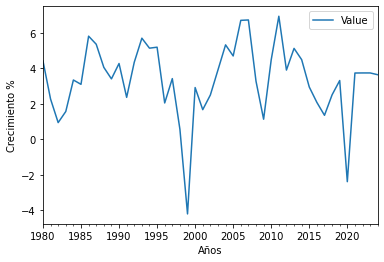

In [7]:
Dpib.plot()
plt.xlabel('Años')
plt.ylabel('Crecimiento %')
plt.show()

In [8]:
Mempl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 689 entries, 1955-01-01 to 2012-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALUE   689 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB


In [9]:
YMempl=Mempl.resample('Y', closed='right', convention='end').last()

In [10]:
YMempl.head()

,VALUE
DATE,
1955-12-31,43310.0
1956-12-31,43294.0
1957-12-31,43013.0
1958-12-31,42752.0
1959-12-31,43931.0


In [11]:
# Tasa de Cambio US / EUR
USEU=quandl.get("CUR/EUR")

In [12]:
USEU.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6208 entries, 2000-01-01 to 2016-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RATE    6208 non-null   float64
dtypes: float64(1)
memory usage: 97.0 KB


In [14]:
# SP500 Month
sp500=quandl.get("YALE/SPCOMP")

In [15]:
sp500.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
Year,,,,,,,,,
1871-01-31,4.44,0.26,0.4,12.464061,5.320000,97.250271,5.694836,8.761286,NaN
1871-02-28,4.50,0.26,0.4,12.844641,5.323333,95.644049,5.526101,8.501693,NaN
1871-03-31,4.61,0.26,0.4,13.034972,5.326667,96.551327,5.445411,8.377555,NaN
1871-04-30,4.74,0.26,0.4,12.559226,5.330000,103.034548,5.651684,8.694899,NaN
1871-05-31,4.86,0.26,0.4,12.273812,5.333333,108.099637,5.783108,8.897089,NaN


In [16]:
spidx=sp500.iloc[:,0]
spidx=spidx.loc[slice('1980','2020')]

In [17]:
ret=np.log(sp500.iloc[:,0]).diff(periods=1)

In [18]:
volprox=np.sqrt(255)*ret**2
volprox=volprox.loc[slice('1980','2020')]

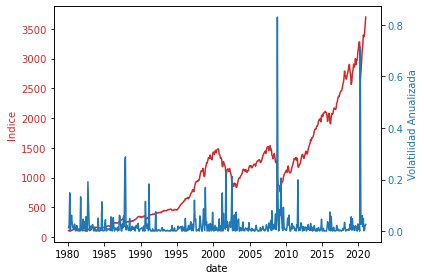

In [19]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Indice', color=color)
ax1.plot(spidx.index, spidx, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Volatilidad Anualizada', color=color)  # we already handled the x-label with ax1
ax2.plot(spidx.index,volprox.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()